# **Computer Vision Basics**


> Topics :

> 1. Loading, Displaying and Saving Images using Opencv
> 2. Image Basics
> 3. Drawing
> 4. Image Processing
> 1. Histogram
> 2. Smoothing and Bluring
> 3. Thresholding
> 4. Gradient and Edge Detection
> 4. Contours



In [ ]:
# Some housekeeping stuff

# load the drive helper and mount
from google.colab import drive

# this will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


## 1) Loading, Displaying and Saving Images using Opencv



### ***Loading image***

In [ ]:
# Import required libs
import cv2
import matplotlib.pyplot as plt


In [ ]:
# Read a image in opencv
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/img2.jpg")

# Check the image shape
image.shape

(426, 640, 3)

### **Displaying image**

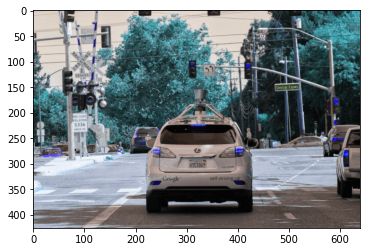

In [ ]:
# Display image 
plt.imshow(image)

In [ ]:
# Convert image to RGB
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

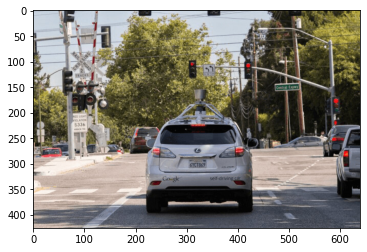

In [ ]:
# Display image 
plt.axis("off")
plt.imshow(image_rgb)

### **Saving image**


In [ ]:
# Save image
cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/save_rgb.jpg",image_rgb)

True

## 2) Image Basics





1.   What is Pixel?
2.   Coordiante System
3.   Accessing each elemt of a pixel





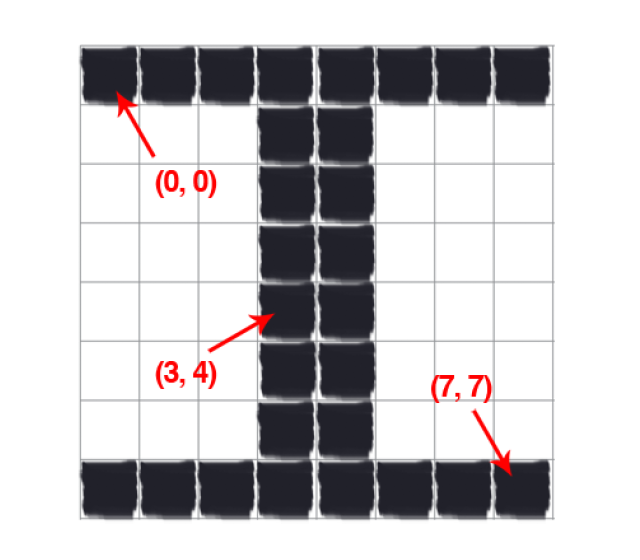

(1254, 1881, 3)


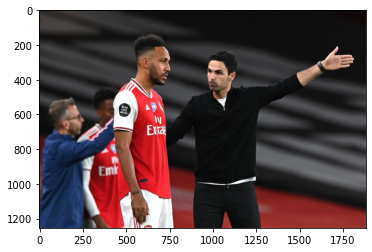

In [ ]:
# Read a image in opencv
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/img1.jpg")

# Convert to rgb 
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Check the image shape
image.shape
print(image.shape)
plt.imshow(image)

In [ ]:
## Accessing elemnts of pixels

# Getting pixel values
(b,g,r) = image[0,0]

print(b,g,r)

0 0 255


In [ ]:
# Setting pixel values
image[0,0] = (0,0,255)

# Getting pixel values
(b,g,r) = image[0,0]
print(b,g,r)

0 0 255


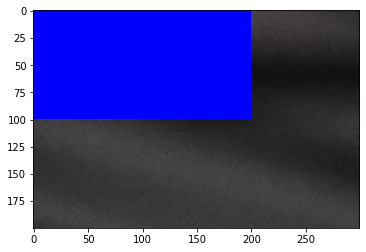

In [ ]:
## Getting a larger area 

corner = image[100:300,:300]
plt.imshow(corner)

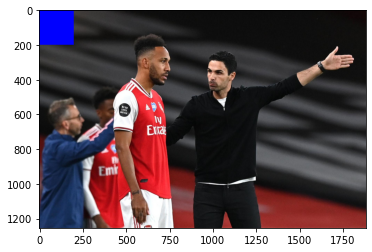

In [ ]:
## Setting pixel values
image[0:200,0:200] = (0,0,255)
plt.imshow(image)

## 3) Drawing

Sub Topics:

1.   Line
2.   Rectangle
3.   Circle

In [ ]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

canvas shape : (300, 300, 3)


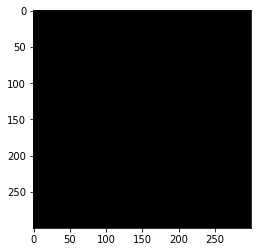

In [ ]:
## Create a canvas 
canvas = np.zeros((300,300,3),dtype='uint8')
print("canvas shape :",canvas.shape)
plt.imshow(canvas)

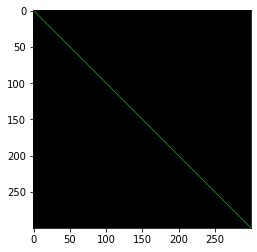

In [ ]:
## Draw Line
green = (0,255,0)
line_img = cv2.line(canvas,(0,0),(300,300),green,1)
plt.imshow(line_img)

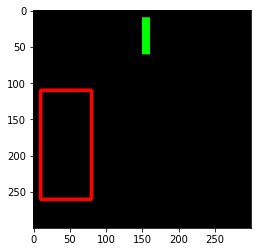

In [ ]:
# Draw rectangle
rect_img = cv2.rectangle(canvas,(150,10),(160,60),green,-1)
plt.imshow(rect_img)

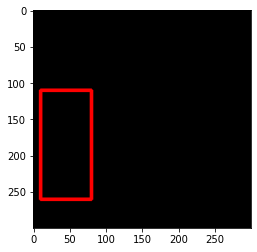

In [ ]:
red = (255,0,0)
rect_img = cv2.rectangle(canvas,(10,110),(80,260),red,3)
plt.imshow(rect_img)

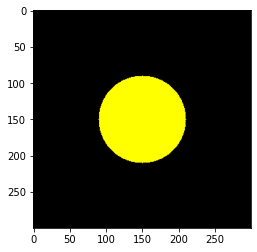

In [ ]:
## Draw Circle
canvas = np.zeros((300,300,3),dtype='uint8')
circle_img = cv2.circle(canvas,(150,150),60,(255,255,0),-1)
plt.imshow(circle_img)

## 4) Image Processing

Sub Topics :

1.   Image Transformation
2.   Image Arithmetic
1.   Bitwise Operations
2.   Masking
1.   Splitting and Merging Channels
2.   Color Spaces
 

## 4.1) Image Transformation

#### 4.1.1) Image translation : moving the image up and down

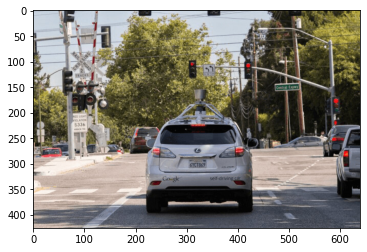

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/img2.jpg")

# Convert to RGB
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
# Define the matrix M
M = np.float32([[1, 0, 150], [0, 1, -200]])

> The first row of the matrix is [1, 0, tx], where tx is the number of pixels we will shift the image left or right. Negative values of tx will shift the image to the left and positive values will shift the image to
the right.

> The second row of the matrix as [0, 1, ty],
where ty is the number of pixels we will shift the image up
or down. Negative value of ty will shift the image up and
positive values will shift the image down.

> tx = 25 and ty = 50, implying that we are shifting the image 25 pixels to the right and 50 pixels down.


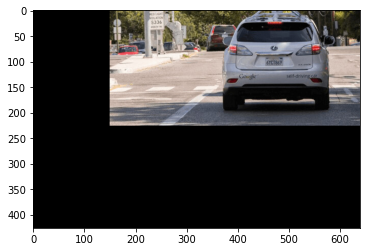

In [ ]:
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.imshow(shifted)

In [ ]:
# Define the matrix M with negative values
M = np.float32([[1, 0, -50], [0, 1, -90]])

> Here, we set tx = -50 and ty = -90, implying that we are shifting the image 50 pixels to the left and 90 pixels up. The image is shifted left and up rather than right and down, because we are providing a negative values for both tx and ty.

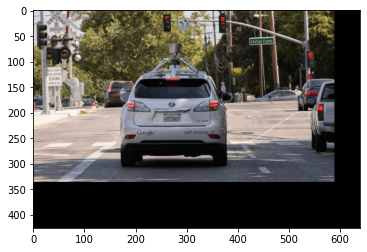

In [ ]:
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.imshow(shifted)

#### 4.1.2) Rotation of image : rotating an image by some angle.

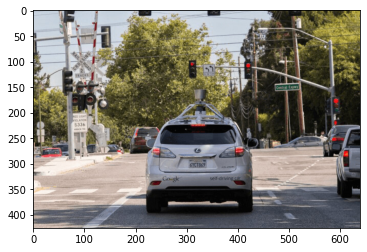

In [ ]:
plt.imshow(image)

In [ ]:
# Rotate around the center of the image.

# Get width and height
h , w = image.shape[:2]
print(h , w )

# Center of the image
center = (w//2,h//2)
center

426 640


(320, 213)

In [ ]:
# Define the matrix
M = cv2.getRotationMatrix2D(center,45,1.0)

The cv2.getRotationMatrix2D function takes three arguments:


1.   point at which we want to rotate the image around (in this case, the center of the image)
2.   the number of degrees we are going to rotate the image by,In this case, we are going to rotate the image 45
degrees
1.   The last argument is the scale of the image. We
haven’t discussed resizing an image yet, but here you can
specify a floating point value, where 1.0 means the same dimensions of the image are used. However, if you specified
a value of 2.0 the image would be doubled in size. Similarly,
a value of 0.5 halves the size of the image.


shape : (426, 640, 3)


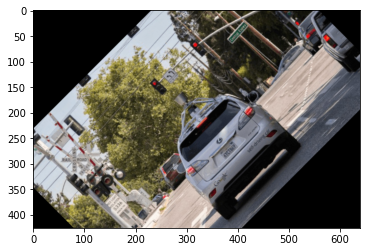

In [ ]:
rotated = cv2.warpAffine(image, M, (w, h))
print("shape :",rotated.shape)
plt.imshow(rotated)

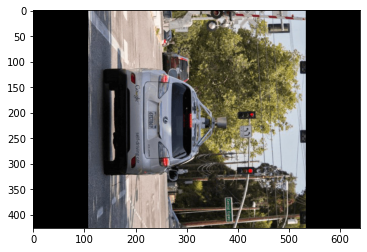

In [ ]:
M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated)

#### 4.1.3) Resizing

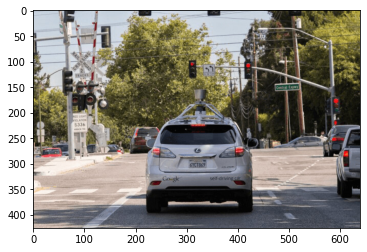

In [ ]:
image.shape
plt.imshow(image)



1. When resizing an image, we need to keep in mind the aspect ratio of the image. 
2. The aspect ratio is the proportional
relationship of the width and the height of the image.
3. If we aren’t mindful of the aspect ratio, our resizing will
return results that don’t look correct.

In [ ]:
# resize the image by specifying the width
r = 150.0/image.shape[1]
dim = (150, int(image.shape[0] * r))
dim

(150, 99)

image shape : (99, 150, 3)


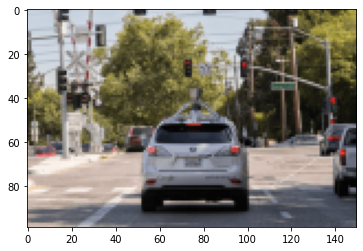

In [ ]:
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
print("image shape :",resized.shape)
plt.imshow(resized)



*   we define our new image width to be 150
pixels. In order to compute the ratio of the new height to
the old height, we simply define our ratio r to be the new
width (150 pixels) divided by the old width, which we access
using image.shape[1]
* Now that we have our ratio, we can compute the new dimensions
of the image on Line. Again, the width of the
new image will be 150 pixels. The height is then computed
by multiplying the old height by our ratio and converting
it to an integer.


image shape : (40, 40, 3)


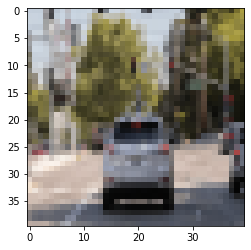

In [ ]:
resized = cv2.resize(image, (40,40), interpolation = cv2.INTER_AREA)
print("image shape :",resized.shape)
plt.imshow(resized)

In [ ]:
# resize the image by specifying the height
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

image shape : (50, 75, 3)


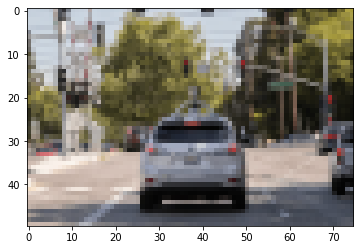

In [ ]:
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
print("image shape :",resized.shape)
plt.imshow(resized)

#### 4.1.4) Flipping

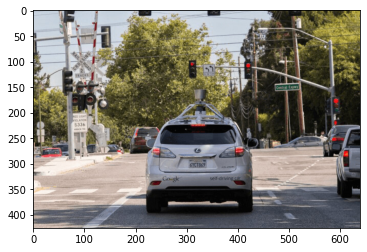

In [ ]:
plt.imshow(image)

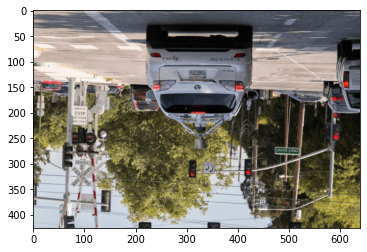

In [ ]:
## Flip vertically
flip = cv2.flip(image,0)

plt.imshow(flip)

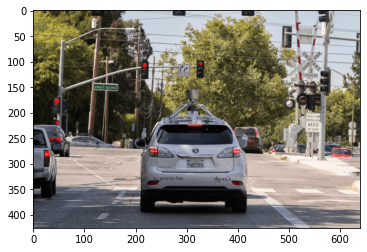

In [ ]:
## Flip horizontally
flip = cv2.flip(image,1)

plt.imshow(flip)

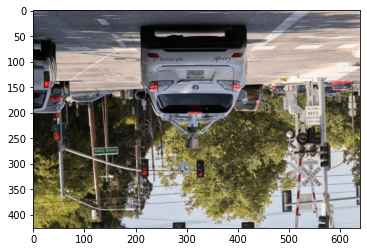

In [ ]:
## Flip horizontally & verically
flip = cv2.flip(image,-1)

plt.imshow(flip)

#### 4.1.5) Cropping

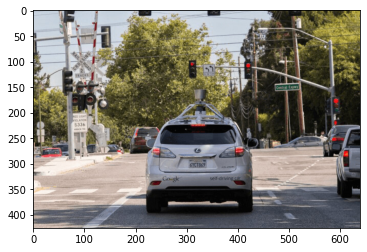

In [ ]:
plt.imshow(image)

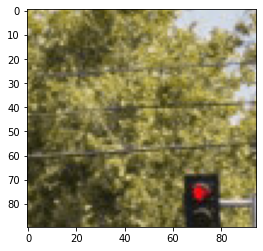

In [ ]:
# Cropping start-y: end-y start-x:end-x
cropped = image[30:120 , 240:335]
plt.imshow(cropped)

## 4.2) Image Arithmetic


 
*   NumPy will perform modulo arithmetic.
 
*  “wrap around” OpenCV, on the other hand, will perform clipping and ensure pixel values never fall outside the range [0, 255].



(426, 640, 3)

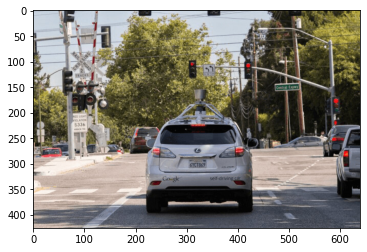

In [ ]:
import numpy as np

#read image 
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/img2.jpg")
image.shape

#convert to rgb 
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
image.shape

In [ ]:
## Opencv add 
cv2_res = cv2.add(np.uint8([200]),np.uint8([10]))
cv2_res

array([[210]], dtype=uint8)

In [ ]:
## Opencv subtract 
cv2_res = cv2.subtract(np.uint8([50]),np.uint8([100]))
cv2_res

array([[0]], dtype=uint8)

In [ ]:
## numpy add
np_add = np.uint8([200])+ np.uint8([80])
np_add

array([24], dtype=uint8)

In [ ]:
## numpy subtract
np_sub = np.uint8([50])- np.uint8([80])
np_sub

array([226], dtype=uint8)

(426, 640, 3)

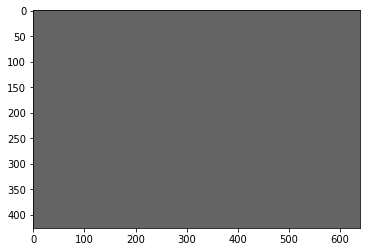

In [ ]:
## Adding elements in a image 
M = np.ones(image.shape, dtype = "uint8") * 100
plt.imshow(M)
M.shape

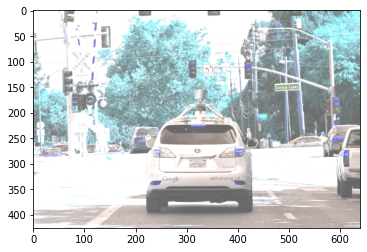

In [ ]:
added = cv2.add(image, M)
plt.imshow(added)

In [ ]:
## Subtracting elements in a image
M = np.ones(image.shape, dtype = "uint8") * 50

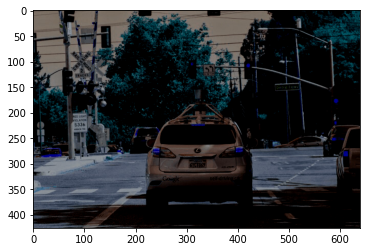

In [ ]:
subtracted = cv2.subtract(image, M)
plt.imshow(subtracted)

## 4.3) Bitwise Operation 

- AND,OR,XOR,NOT



*   A given pixel is turned
“off” if it has a value of zero, and it is turned “on” if the
pixel has a value greater than zero.



In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(300, 300)

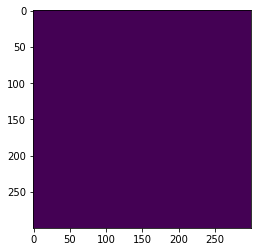

In [ ]:
rectangle = np.zeros((300, 300), dtype = "uint8")
plt.imshow(rectangle)
rectangle.shape

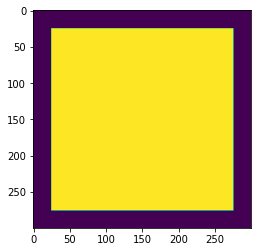

In [ ]:
## Draw an rectangle on the canvas

canvas_rec = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(canvas_rec, (25, 25), (275, 275), 255, -1)
plt.imshow(canvas_rec)

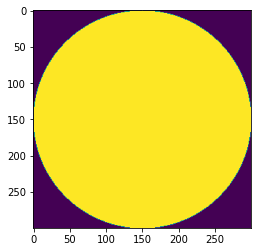

In [ ]:
## Draw an circle on the canvas

canvas_cir = np.zeros((300, 300), dtype = "uint8")
cv2.circle(canvas_cir, (150, 150), 150, 255, -1)
plt.imshow( canvas_cir)

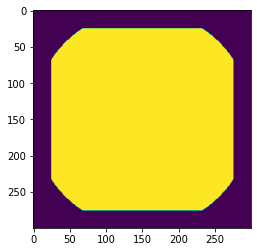

In [ ]:
## Bitwise AND

bitwiseAnd = cv2.bitwise_and(canvas_rec, canvas_cir)
plt.imshow(bitwiseAnd)

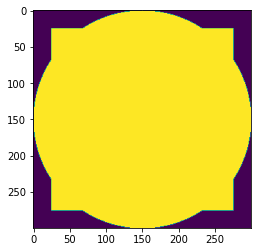

In [ ]:
## Bitwise OR

bitwiseOr = cv2.bitwise_or(canvas_rec, canvas_cir)
plt.imshow(bitwiseOr)

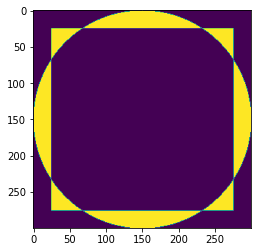

In [ ]:
## Bitwise XOR

bitwiseXor = cv2.bitwise_xor(canvas_rec, canvas_cir)
plt.imshow(bitwiseXor)

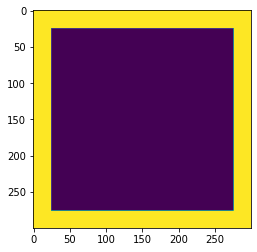

In [ ]:
## Bitwise NOT

bitwiseNot = cv2.bitwise_not(canvas_rec)
plt.imshow(bitwiseNot)

## 4.4)  Masking 

(640, 960, 3)

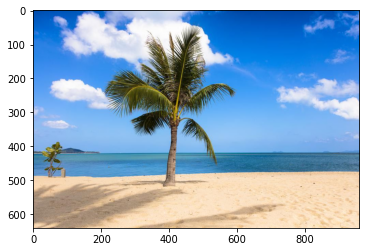

In [ ]:
# Load the image
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/beach.jpg")

# Convert to RGB
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)
image.shape

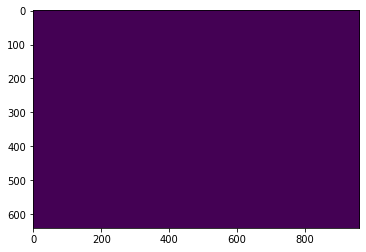

In [ ]:
## Creating a mask 

mask = np.zeros(image.shape[:2], dtype = "uint8")
plt.imshow(mask)


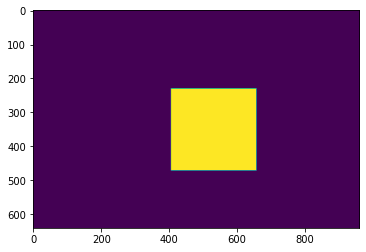

In [ ]:
#get the center of the image
(cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)
cv2.rectangle(mask, (cX - 75, cY - 90), (cX + 175 , cY + 150), 255,-1)
plt.imshow(mask)

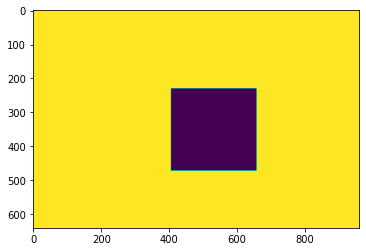

In [ ]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv)

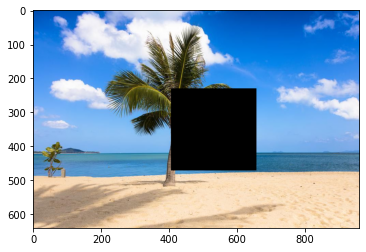

In [ ]:
masked = cv2.bitwise_and(image,image, mask = mask_inv)
plt.imshow(masked)

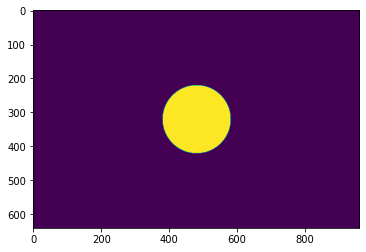

In [ ]:
## Masking using circle

mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.circle(mask, (cX, cY), 100, 255, -1)
plt.imshow(mask)

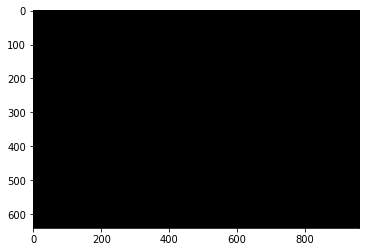

In [ ]:
#do bitwise and
masked = cv2.bitwise_xor(image, image, mask = mask)
plt.imshow(masked)

## 4.5) Splitting and Merging Channels

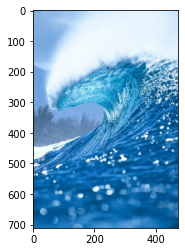

In [ ]:
# read the image
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/sea.jpg")

image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

In [ ]:
## Split the image into different channels 

(B,G,R) = cv2.split(image)

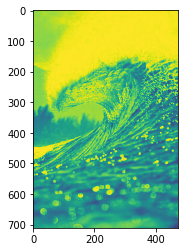

In [ ]:
#Display Blue Channel
plt.imshow(B)

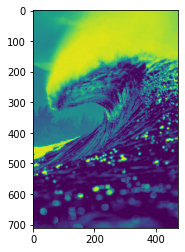

In [ ]:
#Display RED Channel
plt.imshow(R)

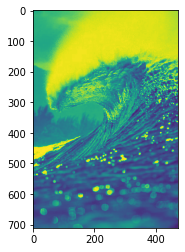

In [ ]:
#Display green Channel
plt.imshow(G)

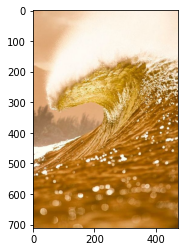

In [ ]:
## Merge this channels 

merged = cv2.merge([B, G, R])
plt.imshow(merged)

In [ ]:
zeros = np.zeros(image.shape[:2], dtype = "uint8")


In [ ]:
plt.imshow("Red", cv2.merge([zeros, zeros, R]))
plt.imshow("Green", cv2.merge([zeros, G, zeros]))
plt.imshow("Blue", cv2.merge([B, zeros, zeros]))

## 4.6) Color Spaces

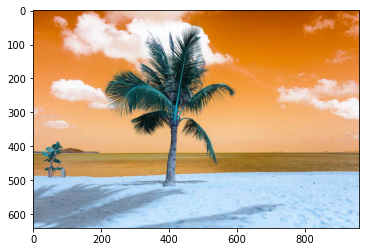

In [ ]:
#Read the the images
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/beach.jpg")
plt.imshow(image)

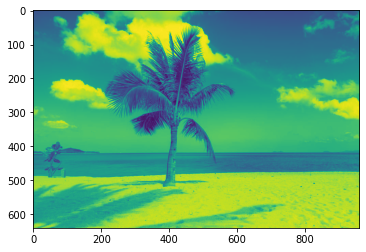

In [ ]:
## Convert the image to gray color space

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

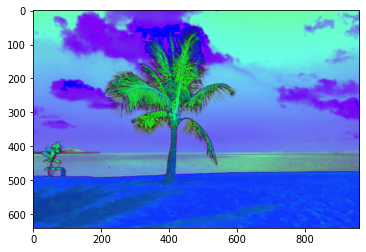

In [ ]:
## Convert the image to HSV color space

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

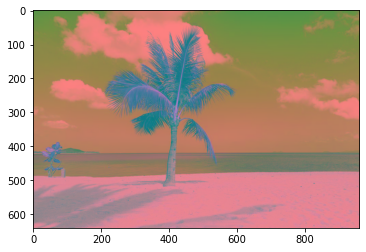

In [ ]:
## Convert the image to LAB color space

lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
plt.imshow(lab)

# 5) Histogram

Sub Topics :

1.   openCV to compute histogram
2.   Image Arithmetic
1.   Bitwise Operations
2.   Masking
1.   Splitting and Merging Channels
2.   Color Spaces
 

**What is a Histogram ?**

*   A histogram represents
the distribution of pixel intensities (whether color or grayscale)
in an image. 
* It can be visualized as a graph (or plot)
that gives a high-level intuition of the intensity (pixel value)
distribution.
* When plotting the histogram, the X-axis serves as our
“bins”. If we construct a histogram with 256 bins, then
we are effectively counting the number of times each pixel
value occurs.
* By simply examining the histogram of an image, you get
a general understanding regarding the contrast, brightness,and intensity distribution.



## 5.1) OpenCV to Compute Histogram 






cv2.calcHist(images,channels,mask,histSize,ranges)
 
**images:** This is the image that we want to compute a
histogram for.

**channels:** This is a list of indexes, where we specify
the index of the channel we want to compute a histogram
for. To compute a histogram of a grayscale
image, the list would be [0]. To compute a histogram
for all three red, green, and blue channels, the channels
list would be [0,1,2].

**mask:** If a mask is
provided, a histogram will be computed for masked
pixels only. If we do not have a mask or do not want
to apply one, we can just provide a value of None.

**histSize:** This is the number of bins we want to use
when computing a histogram. Again, this is a list, one
for each channel we are computing a histogram for.
The bin sizes do not all have to be the same. Here is
an example of 32 bins for each channel: [32,32,32].

**ranges:** Here we specify The range of possible pixel
values. Normally, this is [0, 256] for each channel,

## 5.2) Grayscale Histogram

image shape : (640, 960, 3)


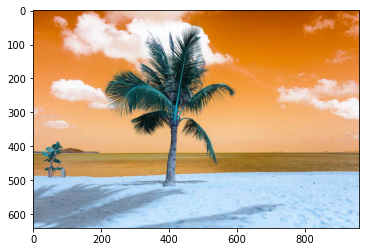

In [ ]:
import cv2
import matplotlib.pyplot as plt

## Read an images
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/beach.jpg")

print("image shape :",image.shape)
plt.imshow(image)

image_gray shape : (640, 960)


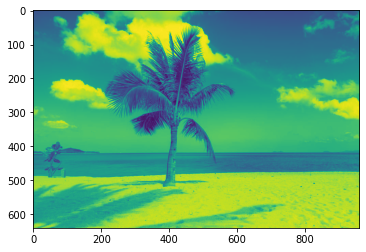

In [ ]:
## Convert the image to gray scale 

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("image_gray shape :",image_gray.shape)
plt.imshow(image_gray)

In [ ]:
## Compute the histogram 
hist = cv2.calcHist([image_gray], [0], None, [256], [0, 256])

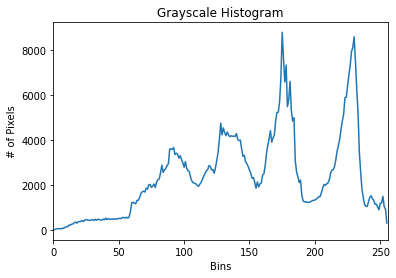

In [ ]:
## Display the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

## 5.2) Color Histogram

image shape : (640, 960, 3)


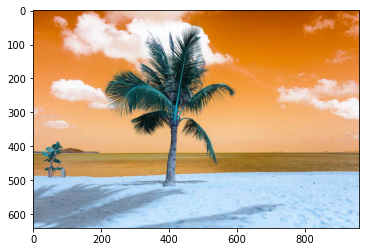

In [ ]:
import cv2
import matplotlib.pyplot as plt

## Read an images
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/beach.jpg")

print("image shape :",image.shape)
plt.imshow(image)

In [ ]:
## Split the image into different channel 
chans = cv2.split(image)
colors = ("b", "g", "r")

Text(0, 0.5, '# of Pixels')

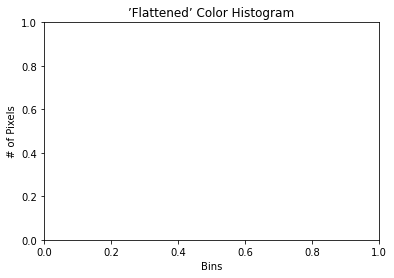

In [ ]:
## ready the plot function 
plt.figure()
plt.title("’Flattened’ Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

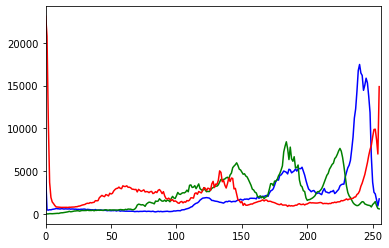

In [ ]:
for (chan, color) in zip(chans, colors):
  hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
  plt.plot(hist, color = color)
  plt.xlim([0, 256])

we can ask a question such as, “How many
pixels have a Red value of 10 AND a Blue value of 30?”.
How many pixels have a Green value of 200 AND a Red
value of 130? By using the conjunctive AND, we are able to
construct multi-dimensional histograms.

## 5.3) Histogram Equalization




*   Histogram equalization improves the contrast of an image
by “stretching” the distribution of pixels. 
* Consider a histogram
with a large peak at the center of it. Applying histogram
equalization will stretch the peak out towards the
corner of the image, thus improving the global contrast of
the image.
* This method is useful when an image contains foregrounds
and backgrounds that are both dark or both light.




image shape : (640, 960, 3)


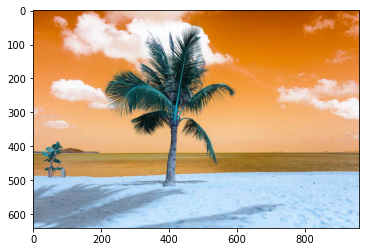

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Read an images
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/beach.jpg")

print("image shape :",image.shape)
plt.imshow(image)

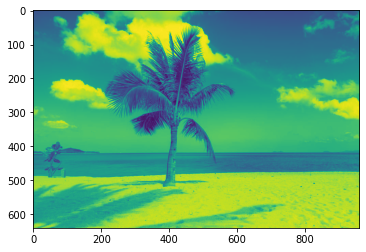

In [ ]:
# convert image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray)

In [ ]:
# histogram equalization 
eq = cv2.equalizeHist(image_gray)

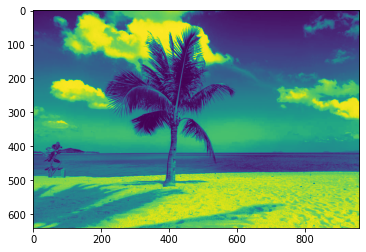

In [ ]:
## display image 
plt.imshow(eq)

## 5.4) Histogram and Masks

image shape : (640, 960, 3)


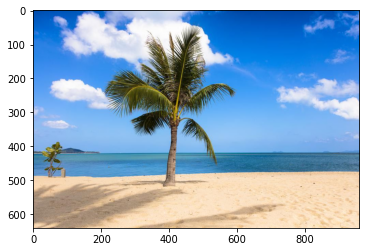

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Read an images
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/beach.jpg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("image shape :",image.shape)
plt.imshow(image_rgb)

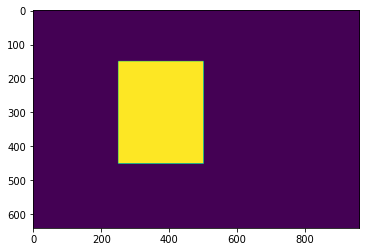

In [ ]:
## Creating a canvas 
mask = np.zeros(image.shape[:2], dtype = "uint8")

#create a box
cv2.rectangle(mask, (250, 150), (500 , 450), 255,-1)
plt.imshow(mask)

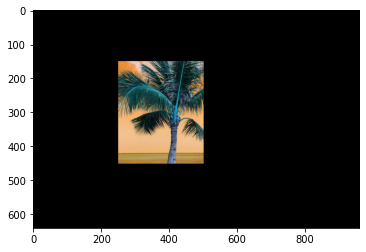

In [ ]:
masked = cv2.bitwise_and(image, image, mask = mask)
plt.imshow(masked)

In [ ]:
## Split the image into different channel 
chans = cv2.split(image)
colors = ("b", "g", "r")

Text(0, 0.5, '# of Pixels')

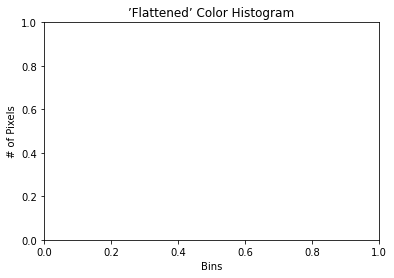

In [ ]:
## ready the plot function 
plt.figure()
plt.title("’Flattened’ Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

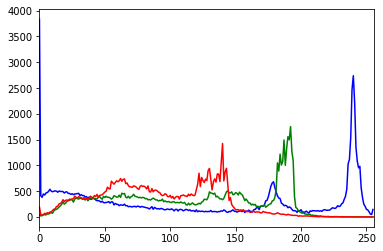

In [ ]:
for (chan, color) in zip(chans, colors):
  hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
  plt.plot(hist, color = color)
  plt.xlim([0, 256])

# 6) SMOOTHING AND BLURRING


* Averaging
* Guassion
* Median
* Bilateral

Practically, this means that each pixel in the image is
mixed in with its surrounding pixel intensities. This “mixture”
of pixels in a neighborhood becomes our blurred pixel.
While this effect is usually unwanted in our photographs,
it’s actually quite helpful when performing image processing
tasks.

## 6.1) Averaging

* As the name suggests, we are going to define a k  k sliding
window on top of our image, where k is always an odd
number. 
* This window is going to slide from left-to-right
and from top-to-bottom. The pixel at the center of this matrix
(we have to use an odd number, otherwise there would
not be a true “center”) is then set to be the average of all
other pixels surrounding it.
* As the size of the kernel increases, the
more blurred our image will become.

image shape : (640, 960, 3)


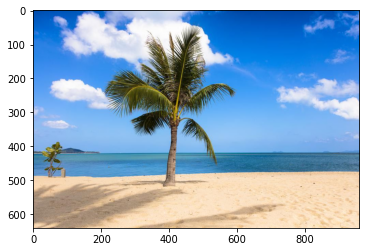

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Read an images
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/beach.jpg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("image shape :",image.shape)
plt.imshow(image_rgb)

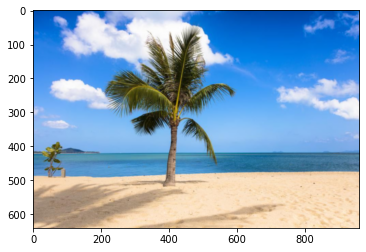

In [ ]:
b1 = cv2.blur(image_rgb, (3, 3))
plt.imshow(b1)

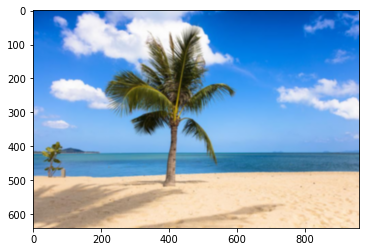

In [ ]:
b2 = cv2.blur(image_rgb, (5, 5))
plt.imshow(b2)

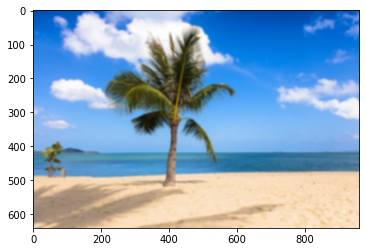

In [ ]:
b3 = cv2.blur(image_rgb, (7, 7))
plt.imshow(b3)

## 6.2) Gaussian


*   Gaussian
blurring is similar to average blurring, but instead of
using a simple mean, we are now using a weighted mean,
where neighborhood pixels that are closer to the central
pixel contribute more “weight” to the average.



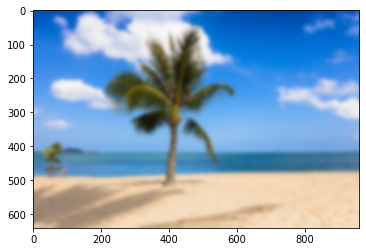

In [ ]:
gau_blur = cv2.GaussianBlur(image_rgb, (33, 33), 0)
plt.imshow(gau_blur)

## 6.3) Median

* When applying a median blur, we first define our kernel
size k. Then, as in the averaging blurring method, we consider
all pixels in the neighborhood of size kk. 
* But, unlike
the averaging method, instead of replacing the central pixel
with the average of the neighborhood, we instead replace
the central pixel with the median of the neighborhood

In [ ]:
## 6.3) Median 


## 6.4) Bilateral

* In order to reduce noise while still maintaining edges, we
can use bilateral blurring. Bilateral blurring accomplishes
this by introducing two Gaussian distributions.

* The first Gaussian function only considers spatial neighbors,
that is, pixels that appear close together in the (x, y)
coordinate space of the image. 

* The second Gaussian then
models the pixel intensity of the neighborhood, ensuring
that only pixels with similar intensity are included in the
actual computation of the blur.

In [ ]:
## 

* In order to reduce noise while still maintaining edges, we
can use bilateral blurring. Bilateral blurring accomplishes
this by introducing two Gaussian distributions.

* The first Gaussian function only considers spatial neighbors,
that is, pixels that appear close together in the (x, y)
coordinate space of the image. 

* The second Gaussian then
models the pixel intensity of the neighborhood, ensuring
that only pixels with similar intensity are included in the
actual computation of the blur.


# 7) Thresholding



*   A simple thresholding example would be selecting a pixel
value p, and then setting all pixel intensities less than p to
zero, and all pixel values greater than p to 255.



## 7.1) Simple Thresholding

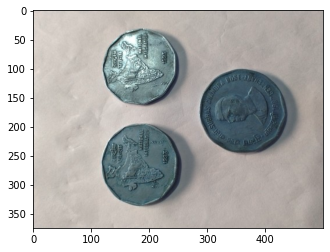

In [ ]:
import cv2
import matplotlib.pyplot as plt


# read image
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/coins.jpeg")
plt.imshow(image)

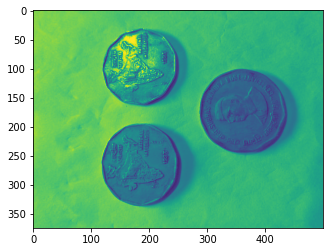

In [ ]:
# convert image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray)

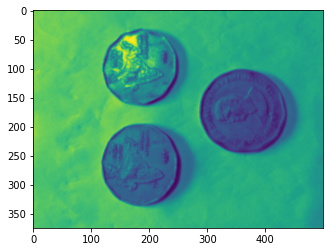

In [ ]:
#blur the image to remove high freq noise
blurred_img = cv2.GaussianBlur(image_gray, (5, 5), 0)
plt.imshow(blurred_img)

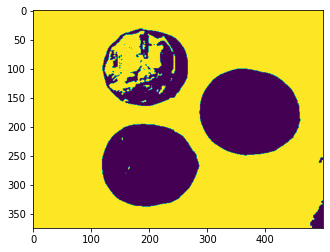

In [ ]:
# simple thresholding
(T, thresh) = cv2.threshold(blurred_img, 145, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)

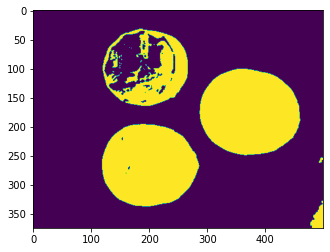

In [ ]:
# inverse threshold 
(T, threshInv) = cv2.threshold(blurred_img, 145, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshInv)

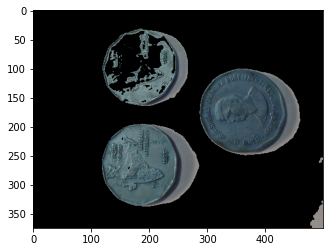

In [ ]:
bitwise_and_img = cv2.bitwise_and(image, image, mask =threshInv)
plt.imshow(bitwise_and_img)

## 7.2) Adaptive Thresholding

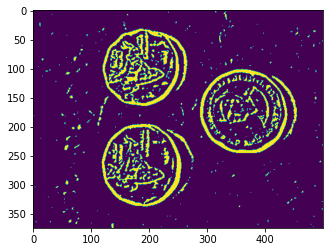

In [ ]:
# mean neighborhood values
mean_thresh = cv2.adaptiveThreshold(blurred_img, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
plt.imshow(mean_thresh)

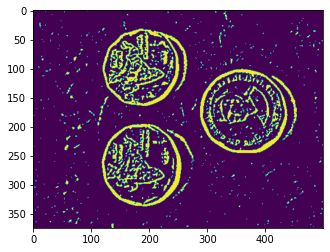

In [ ]:
# Gaussian neighborhood values
gau_thresh = cv2.adaptiveThreshold(blurred_img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
plt.imshow(gau_thresh)

## 7.3) otsu and riddler-calvard

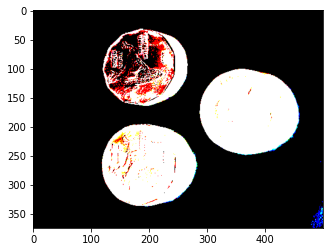

In [ ]:
import mahotas
T = mahotas.thresholding.otsu(blurred_img)
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
plt.imshow(thresh)

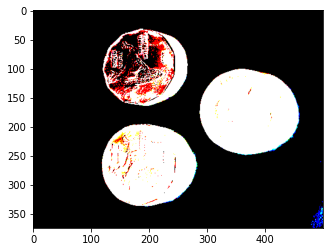

In [ ]:
T = mahotas.thresholding.rc(blurred_img)
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
plt.imshow(thresh)

# 8)Gradients and Edge Detection

*   The first thing we are going to do is find the “gradient” of
the grayscale image, allowing us to find edge-like regions
in the x and y direction.

* We’ll then apply Canny edge detection, a multi-stage process
of noise reduction (blurring), finding the gradient of
the image (utilizing the Sobel kernel in both the horizontal
and vertical direction), non-maximum suppression, and
hysteresis thresholding



## 8.1) laplacian and sobel

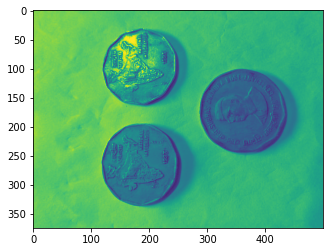

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# read image
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/coins.jpeg")

# convert the image to gray
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray)

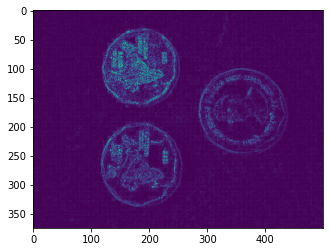

In [ ]:
lap = cv2.Laplacian(image_gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
plt.imshow(lap)

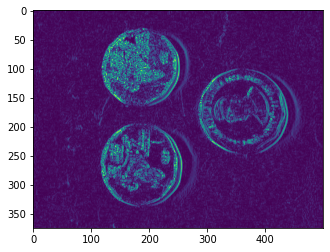

In [ ]:
## Apply sobel 

sobelX = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0)

sobelX = np.uint8(np.absolute(sobelX))

plt.imshow(sobelX)

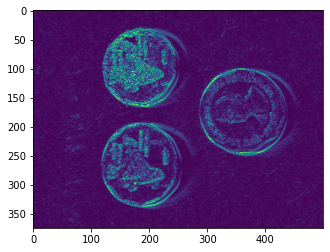

In [ ]:
sobelY = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1)

sobelY = np.uint8(np.absolute(sobelY))

plt.imshow(sobelY)

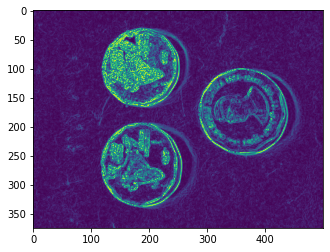

In [ ]:
sobelCombined = cv2.bitwise_or(sobelX, sobelY)
plt.imshow(sobelCombined)

## 8.2) canny edge detector



*   The Canny edge detector is a multi-step process. 
*   It involves
blurring the image to remove noise, computing Sobel gradient
images in the x and y direction, suppressing edges, and
finally a hysteresis thresholding stage that determines if a
pixel is “edge-like” or not.



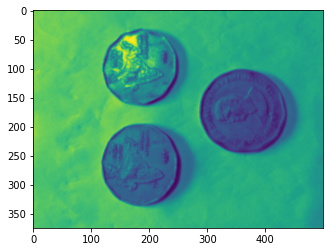

In [ ]:
# read image
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/computer_vision_basic/coins.jpeg")

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_blur = cv2.GaussianBlur(image_gray, (5, 5), 0)
plt.imshow(image_blur)


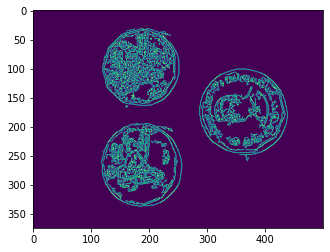

In [ ]:
canny = cv2.Canny(image, 30,180)
plt.imshow(canny)

* The first argument we
supply is our blurred, grayscale image. Then, we need to
provide two values: threshold1 and threshold2.

* Any gradient value larger than threshold2 is considered
to be an edge. Any value below threshold1 is considered
not to be an edge. 

*Values in between threshold1
and threshold2 are either classified as edges or non-edges